# 이미지 처리 방법

(1) 픽셀기반 처리 : 픽셀 단위로 처리<br>
(2) 블록기반 처리 : 블록 (픽셀를 그룹화한 것) 단위로 처리 - 필터<br>
(3) 주파수 기반 처리 : 주파수 영역으로 변환하여 처리 - FFT, DCT, WT 등<br>

# 이미지 픽셀 값 출력

In [ ]:
import cv2

img = cv2.imread("images/lenna.png")
px = img[200, 100]
print(px)

[ 75  61 173]


- img[200, 100] : 픽셀의 좌표
- Blue (75), Green (61), Red (173) 순으로 출력
- <font color=red> 실습 : 다른 픽셀 값 출력</font>

# 픽셀값 변경

In [ ]:
import cv2

img = cv2.imread("images/lenna.png")
# 이미지명[행, 열]
img[200, 100] = [0, 0, 0]

cv2.imshow("model", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- img[200, 100] = [0, 0, 0] : 픽셀값을 검정색으로 변경
- <font color=red> 실습 : 다른 픽셀 값 변경</font>


<img src="http://arome.hosting.paran.com/data/img_colab/opencv004.png" width=250>

# 픽셀값을 RGB 채널 값으로 변경

In [ ]:
import cv2

img = cv2.imread("images/lenna.png")

img.itemset((200, 100, 1), 255)

cv2.imshow("model", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- itemset((픽셀y위치, 픽셀x위치, 채널), 색상레벨)
- 채널 (0 : Blue, 1 : Green, 2 : Red)
- <font color=red> 실습 : 다른 채널의 픽셀값 변경</font>

<img src="http://arome.hosting.paran.com/data/img_colab/opencv005.png" width=250>

# 이미지의 속성 출력

In [ ]:
import cv2

img = cv2.imread("images/lenna.png")

print(img.shape)
print(img.size)
print(img.dtype)

(512, 512, 3)
786432
uint8


- img.shape : 이미지 크기
- img.size : 전체 픽셀 수
- img.dtype : 데이터 타입

# ROI (Region of Image) 설정

In [ ]:
import cv2

img = cv2.imread("images/lenna.png")
cv2.imshow("orginal", img)

# 행(세로)과 열(가로)
subimg = img[200:370, 200:350]
cv2.imshow("cutting", subimg)

cv2.waitKey(0)
cv2.destroyAllWindows()

- img[200:370, 200:350] : 출력할 이미지의 영역
- <font color=red>실습 : 다른 이미지의 영역 출력</font>

<img src="http://arome.hosting.paran.com/data/img_colab/opencv006.png">

# RGB 채널 분리

In [ ]:
import cv2

img = cv2.imread("images/lenna.png")

b = img[:, :, 0]
g = img[:, :, 1]
r = img[:, :, 2]

cv2.imshow("blue channel", b)
cv2.imshow("green channel", g)
cv2.imshow("red channel", r)

cv2.waitKey(0)
cv2.destroyAllWindows()

- img[:, :, 0] : blue 채널
- img[:, :, 1] : green 채널
- img[:, :, 2] : red 채널
- 흰색이 가까울수록 픽셀 수가 많다는 것을 의미

<img src="http://arome.hosting.paran.com/data/img_colab/opencv007.png" width=200>
<img src="http://arome.hosting.paran.com/data/img_colab/opencv008.png" width=200>
<img src="http://arome.hosting.paran.com/data/img_colab/opencv009.png" width=200>

# RGB 채널 합치기

In [ ]:
import cv2

img = cv2.imread("images/lenna.png")

b = img[:, :, 0]
g = img[:, :, 1]
r = img[:, :, 2]

merge_img = cv2.merge((b, g, r))

cv2.imshow("merge", merge_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

- cv2.merge((b, g, r) : RGB 각 채널을 합침

# 도형 그리기

- cv2.line(배경이미지, 시작점좌표, 끝점좌표, 색상, 선두께) : 직선 그리기 함수
- cv2.circle(배경이미지, 중심좌표, 반지름, 색상, 선두께) : 원 그리기 함수
- cv2.rectangle(배경이미지, 좌상단점좌표, 우하단점좌표, 색상, 선두께) : 사각형 그리기 함수
- cv2.ellipse(배경이미지, 중심좌표, 장축/단축길이, 호의시작각, 호의 종료각, 색상, 선두께) : 타원 그리기 함수
- cv2.putText(배경이미지, 출력내용, 출력시작좌표, 폰트, 크기, 색상, 굵기) : 텍스트 입력 함수

In [ ]:
import cv2

img = cv2.imread("images/lenna.png")
img = cv2.rectangle(img, (200, 200), (350, 370), (0, 0, 255), 3)

font = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.putText(img, "ROI Region", (200, 180), font, 1, (255, 0, 0), 4)

cv2.imshow("rectangle", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

<img src="http://arome.hosting.paran.com/data/img_colab/opencv021.png" width=200>

# 한글 출력하기

In [ ]:
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np

img = cv2.imread("images/lenna.png")

# 폰트와 폰트 크기 설정
font = ImageFont.truetype("fonts/gulim.ttc", 30)
# 이미지를 PIL 이미지로 변환
img_pil = Image.fromarray(img)
draw = ImageDraw.Draw(img_pil)
# PIL 이미지에 문자 출력
# fill = (blue, green, red, alpha)
draw.text((200, 20), "Lena 이미지", font=font, fill=(255, 0, 0, 0))

# PIL 이미지를 numpy 배열로 변환
img = np.array(img_pil)

cv2.imshow("lena", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

<img src="http://arome.hosting.paran.com/data/img_colab/opencv022.png" width=200>

# 이미지 합성하기 (비트 연산)

In [ ]:
import cv2
import numpy as np

img = cv2.imread("images/lenna.png")
mask = cv2.imread("images/tiger.png")

# mask 이미지를 붙일 위치의 배경 이미지 잘라내기 (ROI)
rows, cols, channels = mask.shape
roi = img[50:rows+50, 150:cols+150]

#cv2.imshow('(1)Original', img)
#cv2.imshow('(1)tiger', mask)

# 마스크 이미지 만들기 (이진 이미지)
mask2gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
#cv2.imshow('(2)tiger_gray', mask2gray)
ret, mask_b =  cv2.threshold(mask2gray, 200, 255, cv2.THRESH_BINARY)
#cv2.imshow('(3)tiger_mask', mask_b)

# 마스크 이미지 반전 (흑백 전환)
mask_b_inv = cv2.bitwise_not(mask_b)

# 호랑이 이미지에서 마스크 부분만 추출하기
img_bg = cv2.bitwise_and(roi, roi, mask=mask_b)
img_fg = cv2.bitwise_and(mask, mask, mask=mask_b_inv)

#cv2.imshow('(4)mask_bg', img_bg)
#cv2.imshow('(4)mask_fg', img_fg)

# ROI 이미지에 마스크 이미지 합하기
bg_fg = cv2.add(img_bg, img_fg)
#cv2.imshow('(5)roi+mask', dst)

# 배경이미지에 해당 위치에 합한 이미지 붙이기
img[50:rows+50, 150:cols+150] = bg_fg
cv2.imshow('(6)result', img)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

- cv2.bitwise_and(src1, src2, mask) : mask의 값이 아닌 부분만 src1과 src2를 AND 연산
  - mask는 흑백이미지여야 함
  - mask 값이 0인 부분 (검정)은 연산되지 않고 검정색 부분 그대로 놓여짐
      
  (3) tiger_mask
  <img src="http://arome.hosting.paran.com/data/img_colab/opencv028.png"> 
  
  (4) mask_fg
  <img src="http://arome.hosting.paran.com/data/img_colab/opencv026.png"> 
  
  (5) roi+mask
  <img src="http://arome.hosting.paran.com/data/img_colab/opencv027.png">   
  
  (6)result
  <img src="http://arome.hosting.paran.com/data/img_colab/opencv025.png" width=200> 

# 색상 추적하기

In [ ]:
import cv2
import numpy as np

img = cv2.imread("images/balloon.jpg")
cv2.imshow('Original', img)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower = np.array([-10, 100, 100])
upper = np.array([10, 255, 255])

mask = cv2.inRange(hsv, lower, upper)
img2 = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow('Extract Color', img2)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

- cv2.cvtColor(img, cv2.COLOR_BGR2HSV) : HSV 색상 공간으로 변경
- cv2.inRange(hsv, lower_red, upper_red) : 범위에 해당하는 값이 아니면 0으로 채움
- cv2.bitwise_and(img, img, mask=mask_red) : mask 값이 0이 아닌 부분만 AND 연산

- blue의 경우
  - lower_blue = np.array([100, 100, 100])
  - upper_blue = np.array([130, 255, 255])
- green의 경우
  - lower_green = np.array([40, 100, 100])
  - upper_green = np.array([70, 255, 255])
- yellow의 경우
  - lower_green = np.array([10, 100, 100])
  - upper_green = np.array([40, 255, 255])

  
<img src="http://arome.hosting.paran.com/data/img_colab/opencv023.png">
<img src="http://arome.hosting.paran.com/data/img_colab/opencv024.png">

# 이미지 필터링 - blur

In [ ]:
import cv2
import numpy as np

img = cv2.imread("images/lenna.png")

kernel = np.ones((5, 5), np.float32) / 25
blur = cv2.filter2D(img, -1, kernel)

cv2.imshow('blur', blur)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

- ones(5,5) : 5행 5열의 원소를 1로 채움
- cv2.filter2D(img, -1, kernel) : 2번째 파라미터는 색의 깊이 (몇 비트)로 -1이면 원본 이미지와 동일

<img src="http://arome.hosting.paran.com/data/img_colab/opencv011.png" width=200>

# 침식과 팽창

In [ ]:
import cv2
import numpy as np

img = cv2.imread("images/number.png", cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3, 3), np.uint8)

erosion = cv2.erode(img, kernel, iterations=1)
dilation = cv2.dilate(img, kernel, iterations=1)

cv2.imshow('orignal', img)
cv2.imshow('erosion', erosion)
cv2.imshow('dilation', dilation)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

- Erosion (침식) : 이미지의 경계부분을 배경 픽셀로 변경하는 작업 (1이 0으로 변경)
- Dilation (팽창) : 이미지의 배경부분을 전경 픽셀로 변경하는 작업 (0이 1로 변경)
- iterations = 1 : 반복 적용 회수 (회수가 많아지면 침식과 팽창의 효과가 커짐)

<img src="http://arome.hosting.paran.com/data/img_colab/opencv012.png" width=150>
<img src="http://arome.hosting.paran.com/data/img_colab/opencv013.png" width=150>
<img src="http://arome.hosting.paran.com/data/img_colab/opencv014.png" width=150>

# Opening과 Closing

In [ ]:
import cv2
import numpy as np

img1 = cv2.imread("images/noise_A.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("images/noise_B.png", cv2.IMREAD_GRAYSCALE)

cv2.imshow('originalA', img1)
cv2.imshow('originalB', img2)

kernel = np.ones((3, 3), np.uint8)

opening = cv2.morphologyEx(img1, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel)

cv2.imshow('opening', opening)
cv2.imshow('closing', closing)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

- Opening : erosion 수행 후에 바로 dilate을 수행하여 원래 이미지 크기로 돌려 놓는 것
- Closing : dilate 수행 후에 바로 erosion을 수행하여 원래 이미지 크기로 돌려 놓는 것

<img src="http://arome.hosting.paran.com/data/img_colab/opencv015.png" width=150>
<img src="http://arome.hosting.paran.com/data/img_colab/opencv016.png" width=150>

- 실행 결과

<img src="http://arome.hosting.paran.com/data/img_colab/opencv017.png" width=150>
<img src="http://arome.hosting.paran.com/data/img_colab/opencv018.png" width=150>

# 에지 추출 – Canny 에지 추출기

In [ ]:
import cv2

img = cv2.imread("images/lenna.png", cv2.IMREAD_GRAYSCALE)

edge = cv2.Canny(img, 50, 200)
# 색상 반전
edge2 = cv2.bitwise_not(edge)

cv2.imshow("edge", edge)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

- cv2.Canny(이미지, 최소값, 최대값)

<img src="http://arome.hosting.paran.com/data/img_colab/opencv019.png" width=200>

# 윤곽선 추출

In [ ]:
import cv2

img = cv2.imread("images/earth.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thr = cv2.threshold(gray, 127, 255, 0)
_, contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img, contours, 79, (0, 0, 255), 1)
cv2.imshow("contour", img)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

error: ignored

- cv2.threshold(이미지, 문턱값, 픽셀 최대값, 문턱값 적용 방법) : 이진 이미지를 생성 (0인 경우
    문턱값보다 크면 픽셀 최대값을 할당하고, 작으면 0을 할당)
- cv2.findContours(이미지, 추출 모드, 근사 방법) : RETR_TREE (모든 외곽선을 추출하고 외곽선 간의 상관관계 추출), CHAIN_APPROX_SIMPLE (수평, 수직, 대각선인 경우 중간의 점들은 버리고 끝점 들만 남김)
  - contours를 찾는 방법
    - cv2.RETR_EXTERNAL : contours line중 가장 바같쪽 Line만 찾음.
    - cv2.RETR_LIST : 모든 contours line을 찾지만, hierachy 관계를 구성하지 않음.
    - cv2.RETR_CCOMP : 모든 contours line을 찾으며, hieracy관계는 2-level로 구성함.
    - cv2.RETR_TREE : 모든 contours line을 찾으며, 모든 hieracy관계를 구성함.
    
  - contours를 찾을 때 사용하는 근사치 방법
    - cv2.CHAIN_APPROX_NONE : 모든 contours point를 저장.
    - cv2.CHAIN_APPROX_SIMPLE : contours line을 그릴 수 있는 point 만 저장. (ex; 사각형이면 4개 point)
    - cv2.CHAIN_APPROX_TC89_L1 : contours point를 찾는 algorithm
    - cv2.CHAIN_APPROX_TC89_KCOS : contours point를 찾는 algorithm
    
- cv2.drawContours(원본이미지, 외곽선 값, 그릴 외곽선 인덱스, 외곽선 색상, 선의 두께) : 인덱스가 -1이면 모든 외곽선을 그림

<img src="http://arome.hosting.paran.com/data/img_colab/opencv020.png" width=350>

# 이미지 모멘트

- 객체의 무게중심, 면적 등과 같은 특성을 구할 때 유용
- 종류 : 공간 모멘트 (Spatial Moments), 중심 모멘트 (Central Moments), 평준화된 중심 모멘트 (Central Normalized Moments)

- cv2.moments(윤곽선 데이터) 함수를 활용하여 구함

In [ ]:
contour = contours[79]
mmt = cv2.moments(contour)

# 윤곽선의 무게중심
cx = int(mmt['m10']/mmt['m00'])
cy = int(mmt['m01']/mmt['m00'])

cv2.circle(img, (cx, cy), 2, (0, 0, 255), -1)
cv2.imshow("contour_center", img)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

<img src="http://arome.hosting.paran.com/data/img_colab/opencv029.png" width=350>

### 윤곽선 면적과 길이 계산

In [ ]:
# 윤곽선 면적 계산
contour_area = cv2.contourArea(contour)

# 윤곽선의 길이 계산 (True : 윤곽선을 폐곡선으로 설정)
contour_len = cv2.arcLength(contour, True)

print("윤곽선 면적 : ", contour_area)
print("윤곽선 길이 : ", contour_len)

윤곽선 면적 :  1872.5
윤곽선 길이 :  245.86500453948975


#### 전체 윤곽선들의 면적 계산 

In [ ]:
import numpy as np

areas = [cv2.contourArea(c) for c in contours]

print(areas)

[199342.0, 2.0, 4.0, 2.0, 41729.5]


### 윤곽선 근사화 (꼭지점 줄이기)

In [ ]:
import cv2

img = cv2.imread("images/rect.png")
imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2.imshow("Original", img)

ret, thr = cv2.threshold(imggray, 127, 255, 0)
contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img, contours, 0, (0, 255, 0), 2)
#cv2.imshow("contour", img)

# 윤곽선 길이의 10% 길이 이내를 근사 오차로 사용
apsilon = 0.1 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, apsilon, True)
cv2.drawContours(img, [approx], 0, (0, 255, 0), 2)
cv2.imshow("approx_contour", img)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

- cv2.approxPolyDB(cnt, epsilon, True) : 곡선 또는 다각형의 꼭지점 수를 줄여 새로운 곡선을 생성
  - cnt : 윤곽선
  - epsilon : 근사도 (커지면 꼭지점 개수가 0이 됨)
  - True : 폐곡선 여부
  <br><br>
  - contour 결과
<img src="http://arome.hosting.paran.com/data/img_colab/opencv031.png">  

  - 간략화한 contour 결과
<img src="http://arome.hosting.paran.com/data/img_colab/opencv030.png">

### 블록한 면만 그리기

In [ ]:
import cv2

img = cv2.imread("images/maple.jpg")
imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thr = cv2.threshold(imggray, 200, 255, 0)
contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#cv2.drawContours(img, contours, 4, (255, 0, 0), 2)
#cv2.imshow("contour", img)

# 19번째 윤곽선에 대해 처리
# 오목한 부분을 제거
hull = cv2.convexHull(contours[4])
cv2.drawContours(img, [hull], 0, (255, 0, 0), 2)
cv2.imshow("contour", img)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

error: ignored

- 윤곽선 
<img src="http://arome.hosting.paran.com/data/img_colab/opencv032.png" width=250>

- 블록면 처리 후의 윤곽선
<img src="http://arome.hosting.paran.com/data/img_colab/opencv033.png" width=250>

#### 사각형, 원, 타원으로 외곽선 그리기

- x, y, w, h  = cv2.boundingRect(contour) : 사각형 윤곽선 (시작좌표, 길이, 높이 반환)
- (x, y), r = cv2.minEnclosingCircle(contour) : 원 윤곽선 (중심좌표, 반지름 반환)
- ellipse = cv2.fitEllipse(contour) : 타원 윤곽선 
- [vx, vy, x, y] = cv2.fitLine(contour, cv2.DIST_L2, 0, 0.01, 0.01) : 직선 그리기 (직선의 단위벡터, 직선 위의 점 좌표 반환)
  - 거리함수 : cv2.DIST_L1, cv2.DIST_L2, cv2.DIST_L12, cv2.DIST_FAIR, cv2.DIST_WELSCH, cv2.DIST_HUBER 

In [ ]:
import cv2

img = cv2.imread("images/maple.jpg")
imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thr = cv2.threshold(imggray, 240, 255, 0)
contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img1 = img.copy()
# 그릴 사각형의 왼쪽상단의좌표와 길이와 높이를 반환
x, y, w, h  = cv2.boundingRect(contours[4])
cv2.rectangle(img1 , (x, y), (x+w, y+h), (0, 0, 255), 3)
cv2.imshow("rect contour", img1)

img2 = img.copy()
# 그릴 원의 중심좌표와 반지름을 반환
(x, y), r = cv2.minEnclosingCircle(contours[4])
center = (int(x), int(y))
r = int(r)
cv2.circle(img2, center, r, (255, 0, 0), 3)
cv2.imshow("circle contour", img2)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

- 사각형 윤곽선
<img src="http://arome.hosting.paran.com/data/img_colab/opencv034.png" width=250>

- 원 윤곽선
<img src="http://arome.hosting.paran.com/data/img_colab/opencv035.png" width=250>

# 히스토그램 (histogram)

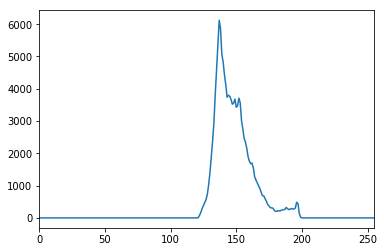

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("images/hist_img.png", cv2.IMREAD_GRAYSCALE)
cv2.imshow("original", img)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.plot(hist)
plt.xlim([0, 255])
plt.show()

k = cv2.waitKey(0)
cv2.destroyAllWindows()

- 히스토그램 (Histogram) : 이미지의 색상 별로 픽셀의 개수를 그래프로 표시한 것
- Numpy, Matplotlib 라이브러리에서 함수를 제공하지만 OpenCV에서 제공하는 calcHist() 함수가 가장 성능이 좋음  
   - calcHist([이미지], [채널], 특정 부분 마스크, [색상 개수], [픽셀값의 범위])
   - 채널은 흑백영상인 경우는 0, 칼라영상인 경우는 B(0), G(1), R(2)

<img src="http://arome.hosting.paran.com/data/img_colab/opencv036.png" width=350>

## 히스토그램 균일화

- 색상 분포를 균일하게 변경하여 이미지의 콘트라스트를 강조하는 방법

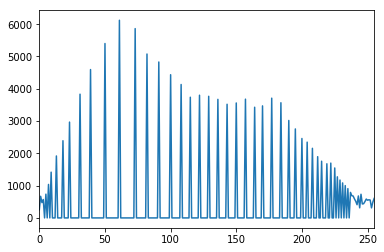

In [ ]:
img = cv2.equalizeHist(img)
cv2.imshow("equalize", img)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.plot(hist)
plt.xlim([0, 255])
plt.show()

k = cv2.waitKey(0)
cv2.destroyAllWindows()

<img src="http://arome.hosting.paran.com/data/img_colab/opencv037.png" width=350>

- 콘트라스트가 너무 강조된 경향이 있으므로 cv2.createCLAHE() 함수를 적용하면 더 나은 결과가 가능함.

## 2차원 히스토그램

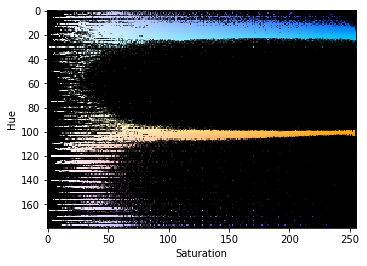

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

hscale = 30

img = cv2.imread("images/back.png")
cv2.imshow("original", img)

hsvmap = np.zeros((180, 256, 3), np.uint8)
h, s = np.indices(hsvmap.shape[:2])
hsvmap[:,:,0] = h
hsvmap[:,:,1] = s
hsvmap[:,:,2] = 255
hsvmap = cv2.cvtColor(hsvmap, cv2.COLOR_HSV2BGR)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([hsv], [0, 1], None, [180, 256],  [0, 180, 0, 256])

hist = np.clip(hist*0.005*hscale, 0, 1)
hist = hsvmap*hist[:,:,np.newaxis] / 255.0

plt.imshow(hist, interpolation="nearest")
plt.xlabel("Saturation")
plt.ylabel("Hue")
plt.show()

k = cv2.waitKey(0)
cv2.destroyAllWindows()

<img src="http://arome.hosting.paran.com/data/img_colab/opencv038.png" width=350>

# 푸리에 변환 (Fourier Transform)

- 주파수 (frequency)를 분석하는데 가장 많이 활용되는 도구로 이미지 픽셀값을 픽셀값의 변화분 (주파수)으로 변환

- 이미지에서 주파수 : 픽셀의 변화량
   - 고주파 성분 : 픽셀값의 변화가 큰 부분 (에지)
   - 저주파 성분 : 픽셀값의 변화가 작은 부분

- 이미지에는 주로 저주파 성분이 다수 포함되어 있음

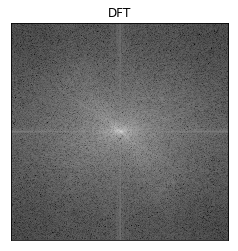

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/lenna.png", cv2.IMREAD_GRAYSCALE)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
m_spectrum = 20 * np.log(np.abs(fshift))

plt.imshow(m_spectrum, cmap="gray")
plt.title("DFT"), plt.xticks([]), plt.yticks([])
plt.show()

- np.fft.fft2(img) : 푸리에 변환 수행
- np.fft.fftshift(f) : 주파수가 0인 컴포넌트를 각 모서리에서 중앙으로 이동하고 재배열시킴
- m_spectrum = 20 * np.log(np.abs(fshift)) : 진폭 스펙트럼을 계산

### 주파수 영역 이미지의 중앙 부분만 잘라서 이미지 복원

<img src="http://arome.hosting.paran.com/data/img_colab/opencv039.png">

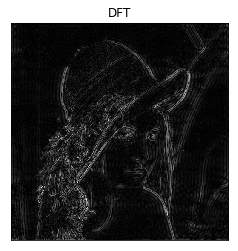

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/lenna.png", cv2.IMREAD_GRAYSCALE)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)

# 푸리에 변환 영역의 중앙부분을 (30, 30) 크기로 잘라냄
fshift[crow-30:crow+30, ccol-30:ccol+30] = 1

# 잘라낸 부분만을 역 푸리에 변환
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.imshow(img_back, cmap="gray")
plt.title("DFT"), plt.xticks([]), plt.yticks([])
plt.show()

- crow, ccol = int(rows/2), int(cols/2) : 중앙점 계산
- fshift[crow-30:crow+30, ccol-30:ccol+30] = 0 : DFT 변환된 이미지의 중앙에서 (-30, -30)~(30, 30) 크기의 사각형 영역을 0으로 채움

- f_ishift = np.fft.ifftshift(fshift) : 재배열된 주파수 값들의 위치를 원래대로 되돌림
- img_back = np.fft.ifft2(f_ishift) : 역 DFT를 수행하여 원래 이지미 영역으로 전환